## Install Required Libraries

In [ ]:
pip install pandas nltk textblob transformers matplotlib googletrans==4.0.0-rc1 --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langsmith 0.1.147 requires httpx<1,>=0.23.0, but you have httpx 0.13.3 which is incompatible.
openai 1.54.5 requires httpx<1,>=0.23.0, but you have httpx 0.13.3 which is incompatible.


## Import Libraries

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from transformers import pipeline
import matplotlib.pyplot as plt
from google.colab import files
from googletrans import Translator

## Download Necessary NLTK Data

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Upload Dataset

id:
Upload dataset dari pc ke google colab

en:


In [ ]:
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
print(f"Dataset uploaded as: {file_path}")

Saving Google_Play_Store_Rev.csv to Google_Play_Store_Rev.csv
Dataset uploaded as: Google_Play_Store_Rev.csv


## Load Dataset

id:
Membaca dataset yang sudah di upload menggunakan pandas

en:


In [ ]:
df = pd.read_csv(file_path, sep=';', na_filter=False)
df = df[df['Review'].notna() & (df['Review'] != '')]
print(df.head())

           User Name  Rating  \
0      Adrian Tanaka       5   
1      Ragel Karmono       1   
2        Ammar Fikri       1   
3  Ferdinand Khaidir       5   
4           Pa Fitri       4   

                                              Review      Waktu Upload  
0                              Terimakasih Dispenduk  03/12/2024 13.20  
1        aplikasi tidak bisa di buka? ini pembodohan  03/12/2024 13.19  
2  sepertinya tidak perlu memakai aplikasi kalau ...  03/12/2024 13.02  
3                                               good  03/12/2024 11.33  
4                                              Bagus  03/12/2024 11.08  


## Define Slang and Normalization Dictionary

id:
Mendefinisikan dictionary untuk slang dan kata kata yang tidak biasa

en:

In [28]:
slang_dict = {
  "lama": "membutuhkan waktu loading yang lama",
  "based": "berbasis",
  "apbn": "anggaran pendapatan dan belanja negara",
  "pakai": "menggunakan",
  "bikin": "membuat",
  "tolong": "harap",
  "yg": "yang",
  "coba": "saya sarankan",
  "agar": "untuk",
  "gabisa": "tidak bisa",
  "kebagusan": "terlalu buruk",
  "terimaksih": "",
  "utk": "untuk",
  "terujud": "terwujud",
  "mantapp": "bagus",
  "mantaaap": "bagus",
  "terimakasi": "",
  "kehati-hatian": "hati-hati",
  "vidio": "video",
  "tlfn": "telefon",
  "dan/atau": "dan",
  "sya": "saya",
  "trus": "terus",
  "uninstal": "uninstall",
  "apanya": "apa",
  "katanya": "",
  "diharuskan": "harus",
  "qr": "kode qr",
  "qrnya": "kode qr",
  "elit": "bad",
  "gw": "saya",
  "ngempanin": "mengurusi",
  "orang2": "orang",
  "tolol": "bodoh",
  "yg": "yang",
  "dukcapil": "dinas kependudukan dan pencatatan sipil",
  "katanya": "tertera",
  "lah": "",
  "lawak": "",
  "min": "admin",
  "sebelom": "sebelum",
  "nipu": "menipu",
  "ngerasa": "merasa",
  "ngejual": "menjual",
  "nyesal": "menyesal",
  "nomer": "nomor",
  "sdg": "sedang",
  "laen": "lain",
  "hnya": "hanya",
  "tdak": "tidak",
  "mmbantu": "membantu",
  "sngat": "sangat",
  "support2": "support",
  "apk": "aplikasi",
  "eh": "",
  "utk": "untuk",
  "ujung2nya": "akhirnya",
  "woii": "",
  "klean": "kalian",
  "lah": "",
  "taek": "tidak bagus",
  "konoha": "indonesia",
  "gk": "tidak",
  "naik2in": "naikin",
  "ndasmu": "tidak benar",
  "kalo": "kalau",
  "jargon": "sebutan",
  "gabisa": "tidak bisa",
  "ente": "anda",
  "aje": "aja",
  "rese": "menyebalkan",
  "bgt": "banget",
  "pls": "",
  "bbrp": "beberapa",
  "lbh": "lebih",
  "disdukcapil": "dinas kependudukan dan pencatatan sipil",
  "dupcapil": "dinas kependudukan dan pencatatan sipil",
  "tp": "tapi",
  "lg": "lagi",
  "hp": "smartphone",
  "gobloggggg": "bodoh",
  "biat": "buat",
  "jutek": "tidak peduli",
  "molorrrr anjinhh": "",
  "klo": "kalau",
  "Burukkk sekaliiii": "sangat buruk",
  "memperibet": "membuat susah",
  "isapan jempol": "tidak benar",
  "menghandle": "handle",
  "eror": "error",
  "k": "ke",
  "dr": "dari",
  "kepemerintahan": "pemerintah",
  "sm": "sama",
  "udh": "udah",
  "smoga": "semoga",
  "gabisa": "tidak bisa",
  "clos": "close",
  "jau": "jauh",
  "gaptek": "tidak mengerti teknologi",
  "menyayangkan": "sangat disayangkan",
  "normal2": "normal",
  "progres": "kemajuan",
  "sosoan": "bergaya",
  "suart": "surat",
  "ma": "",
  "vc": "video call",
  "cs": "customer support",
  "onlen": "online",
  "ngundang": "mengundang",
  "tu": "itu",
  "mksudnya": "maksudnya",
  "biat": "buat",
  "jutek": "cuek",
  "u": "anda",
  "gmn": "gimana",
  "dtg": "datang",
  "ttp": "tetap",
  "d": "di",
  "kebuk": "di buka",
  "load": "loading",
  "dokumenya": "dokumennya",
  "ngak": "tidak",
  "masa": "",
  "ngecek": "check",
  "bener": "benar",
  "it": "developer",
}

## Normalize Text Function

id:
Function untuk menormalisasikan kata-kata yang tidak biasa digunakan menjadi kata-kata yang biasa digunakan menggunakan dictionary yang sudah ditentukan. Penting untuk menerjemahkan reviews ke bahasa inggris untuk di analisis sentimen dari para pengguna

en:


In [ ]:
def normalize_text(text):
    """
    Normalize text by expanding slang dictionary.

    Args:
    text (str): Input text to be normalized.

    Returns:
    str: Normalized text.
    """
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        normalized_tokens = [slang_dict.get(word, word) for word in tokens]
        return ' '.join(normalized_tokens)
    else:
        text = str(text)
        tokens = word_tokenize(text.lower())
        normalized_tokens = [slang_dict.get(word, word) for word in tokens]
        return ' '.join(normalized_tokens)


## Apply Normalization to Reviews

id:
Menormalisasikan reviews dari slang dan singkatan bahasa indonesia dan menampilkan hasilnya

en:


In [25]:
df['Normalized_Review'] = df['Review'].apply(normalize_text)

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# print(df[['Review', 'Normalized_Review']])

# Comment the line below and uncomment the 4 lines above to see the entire comparison
print(df[['Review', 'Normalized_Review']].head())

                                              Review  \
0                              Terimakasih Dispenduk   
1        aplikasi tidak bisa di buka? ini pembodohan   
2  sepertinya tidak perlu memakai aplikasi kalau ...   
3                                               good   
4                                              Bagus   

                                   Normalized_Review  
0                              terimakasih dispenduk  
1       aplikasi tidak bisa di buka ? ini pembodohan  
2  sepertinya tidak perlu memakai aplikasi kalau ...  
3                                               good  
4                                              bagus  


## Translate Text Function

id:
Function untuk menerjemahkan teks dari bahasa Indonesia ke bahasa Inggris menggunakan Google Translate.

en:

In [ ]:
def translate_with_google(text):
    """
    Translate text from Indonesian to English using Google Translate.

    Args:
    text (str): Input text to be translated.

    Returns:
    str: Translated text.
    """
    try:
        translator = Translator()
        return translator.translate(text, src='id', dest='en').text
    except Exception as e:
        return f"Translation Failed: {text}"

## Apply Translation to Normalized Reviews

id:
Menterjemahkan reviews yang telah di normalisasi dan menampilkan hasilnya

en:


In [27]:
df['Translated_Review'] = df['Normalized_Review'].apply(translate_with_google)

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# print(df[['Normalized_Review', 'Translated_Review']])

# Comment the line below and uncomment the 3 lines above to see the entire comparison between the normalized and translated reviews
print(df[['Normalized_Review', 'Translated_Review']].head())

                                   Normalized_Review  \
0                              terimakasih dispenduk   
1       aplikasi tidak bisa di buka ? ini pembodohan   
2  sepertinya tidak perlu memakai aplikasi kalau ...   
3                                               good   
4                                              bagus   

                                   Translated_Review  
0                                Thank you Dispenduk  
1     the application can't be opened?This is a fool  
2  It seems like there is no need to use the appl...  
3                                               Good  
4                                               Good  


## Sentiment Analysis Function

id:
Membuat sebuah fungsi untuk menganalisis sentimen dari review yang telah diterjemahkan menggunakan Large Language Model (LLM)

en:


In [ ]:
def analyze_sentiment_with_neutral(text):
    """
    Analyze sentiment of text using a pre-trained model.

    Args:
    text (str): Input text to be analyzed.

    Returns:
    str: Sentiment label (Positif, Netral, Negatif).
    """
    try:
        sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")
        result = sentiment_model(text)
        label = result[0]['label']
        if label == "LABEL_2":
            return "Positif"
        elif label == "LABEL_1":
            return "Netral"
        elif label == "LABEL_0":
            return "Negatif"
    except Exception as e:
        return "Error"

## Apply Sentiment Analysis to Dataset

id:
Menerapkan fungsi sentiment analysis untuk menganalisis apakah sentimen dari suatu review itu positif, negatif, atau netral ke data yang sudah diterjemahkan dan menampilkan hasilnya.

en:


In [ ]:
df['Review_Sentiment'] = df['Translated_Review'].apply(analyze_sentiment_with_neutral)
print(df[['Translated_Review', 'Review_Sentiment']].head())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

                                   Translated_Review Review_Sentiment
0                                Thank you Dispenduk          Positif
1     the application can't be opened?This is a fool          Negatif
2  It seems like there is no need to use the appl...          Negatif
3                                               Good          Positif
4                                               Good          Positif


## Plot Sentiment Distribution

id:
Men-generate sebuah grafik pie chart yang dapat menampilkan distribusi sentimen dari data yang telah dianalisis

en:


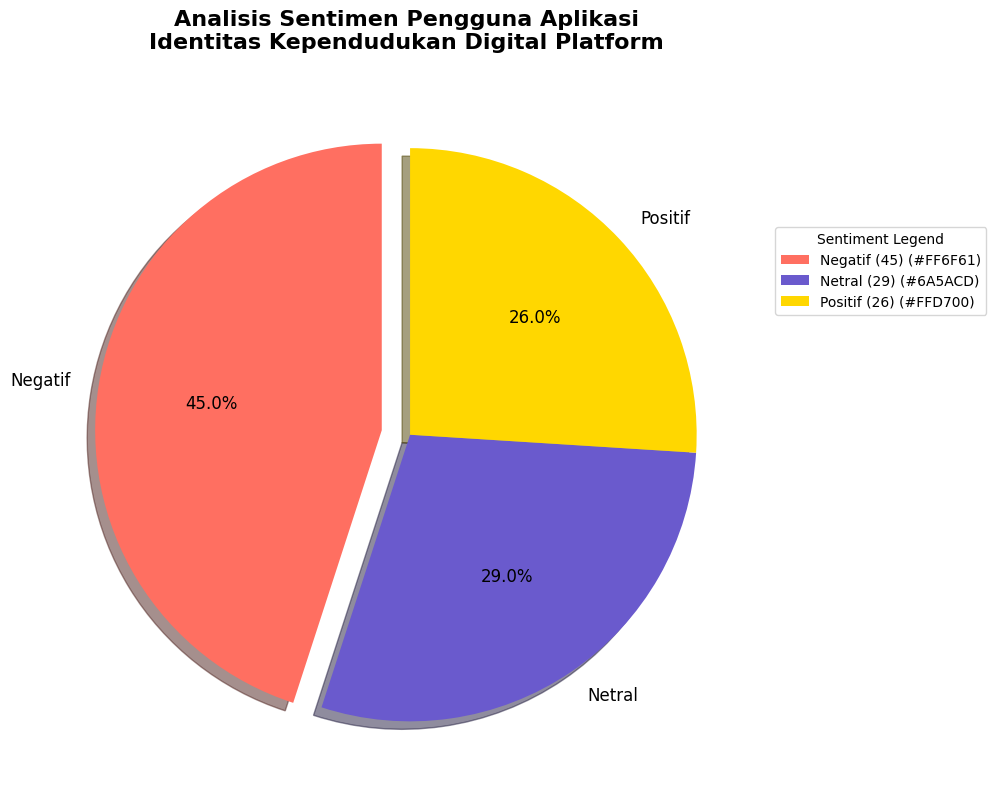

In [29]:
review_sentiment_counts = df['Review_Sentiment'].value_counts()
sentiments = review_sentiment_counts.index
counts = review_sentiment_counts.values

colors = ['#FF6F61', '#6A5ACD', '#FFD700']
explode = [0.1 if sentiment == 'Negatif' else 0 for sentiment in sentiments]

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
  counts,
  labels=sentiments,
  autopct='%1.1f%%',
  startangle=90,
  colors=colors,
  explode=explode,
  shadow=True,
  textprops={'fontsize': 12, 'color': 'black'}
)

# Change title according to use case
plt.title("Analisis Sentimen Pengguna Aplikasi \nIdentitas Kependudukan Digital Platform ", fontsize=16, fontweight='bold', pad=20)
plt.legend(wedges, [f"{sent} ({count}) ({color})" for sent, count, color in zip(sentiments, counts, colors)],
           title="Sentiment Legend", loc="upper left", bbox_to_anchor=(1, 0.8))
plt.tight_layout()
plt.show()